<a href="https://colab.research.google.com/github/Undasnr/DL-ML/blob/main/Ronny_Deep_Neural_Network_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Classifying fully connected layers**

In [2]:
import numpy as np

class FC:
    """
    Number of nodes Fully connected layer from n_nodes1 to n_nodes2

    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the later layer
    initializer: instance of initialization method
    optimizer: instance of optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer

        # Initializing self.W and self.B using the initializer method
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

        # Instantiating variables to store for backward propagation
        self.X = None
        self.dW = None
        self.dB = None

    def forward(self, X):
        """
        Forward propagation

        Parameters
        ----------
        X : The following forms of ndarray, shape (batch_size, n_nodes1)
            input
        Returns
        ----------
        A : The following forms of ndarray, shape (batch_size, n_nodes2)
            output
        """
        # Storing the input X for use in the backward pass
        self.X = X

        # Calculating the output of the fully connected layer
        # A = X @ W + B
        A = np.dot(X, self.W) + self.B

        return A

    def backward(self, dA):
        """
        Backward propagation

        Parameters
        ----------
        dA : The following forms of ndarray, shape (batch_size, n_nodes2)
            Gradient flowing from behind (the next layer)
        Returns
        ----------
        dZ : The following forms of ndarray, shape (batch_size, n_nodes1)
            Gradient to flow forward (to the previous layer)
        """
        # Getting the batch size from the input gradient
        batch_size = dA.shape[0]

        # Calculating the gradients for weights and biases
        # dW = X^T @ dA
        self.dW = np.dot(self.X.T, dA) / batch_size

        # dB = sum(dA) along the batch dimension
        self.dB = np.sum(dA, axis=0) / batch_size

        # Calculating the gradient to pass to the previous layer
        # dZ = dA @ W^T
        dZ = np.dot(dA, self.W.T)

        # Updating the weights and biases using the optimizer
        self = self.optimizer.update(self)

        return dZ

**2. Classifying the initialization method**

In [3]:
import numpy as np

class FC:
    """
    Number of nodes Fully connected layer from n_nodes1 to n_nodes2

    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the later layer
    initializer: instance of initialization method
    optimizer: instance of optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer

        # Initializing self.W and self.B using the initializer method
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

        # Instantiating variables to store for backward propagation
        self.X = None
        self.dW = None
        self.dB = None

    def forward(self, X):
        """
        Forward propagation

        Parameters
        ----------
        X : The following forms of ndarray, shape (batch_size, n_nodes1)
            input
        Returns
        ----------
        A : The following forms of ndarray, shape (batch_size, n_nodes2)
            output
        """
        # Storing the input X for use in the backward pass
        self.X = X

        # Calculating the output of the fully connected layer
        # A = X @ W + B
        A = np.dot(X, self.W) + self.B

        return A

    def backward(self, dA):
        """
        Backward propagation

        Parameters
        ----------
        dA : The following forms of ndarray, shape (batch_size, n_nodes2)
            Gradient flowing from behind (the next layer)
        Returns
        ----------
        dZ : The following forms of ndarray, shape (batch_size, n_nodes1)
            Gradient to flow forward (to the previous layer)
        """
        # Getting the batch size from the input gradient
        batch_size = dA.shape[0]

        # Calculating the gradients for weights and biases
        # dW = X^T @ dA
        self.dW = np.dot(self.X.T, dA) / batch_size

        # dB = sum(dA) along the batch dimension
        self.dB = np.sum(dA, axis=0) / batch_size

        # Calculating the gradient to pass to the previous layer
        # dZ = dA @ W^T
        dZ = np.dot(dA, self.W.T)

        # Updating the weights and biases using the optimizer
        self = self.optimizer.update(self)

        return dZ


class SimpleInitializer:
    """
    Simple initialization with Gaussian distribution

    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : numpy.ndarray, shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # Initializing weights with a Gaussian distribution
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : numpy.ndarray, shape (n_nodes2,)
            Initialized biases (all zeros)
        """
        # Initializing biases to zeros
        B = np.zeros(n_nodes2)
        return B

**3. Classifying optimization methods**

In [4]:
import numpy as np

class FC:
    """
    Number of nodes Fully connected layer from n_nodes1 to n_nodes2

    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the later layer
    initializer: instance of initialization method
    optimizer: instance of optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer

        # Initializing self.W and self.B using the initializer method
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

        # Instantiating variables to store for backward propagation
        self.X = None
        self.dW = None
        self.dB = None

    def forward(self, X):
        """
        Forward propagation

        Parameters
        ----------
        X : The following forms of ndarray, shape (batch_size, n_nodes1)
            input
        Returns
        ----------
        A : The following forms of ndarray, shape (batch_size, n_nodes2)
            output
        """
        # Storing the input X for use in the backward pass
        self.X = X

        # Calculating the output of the fully connected layer
        # A = X @ W + B
        A = np.dot(X, self.W) + self.B

        return A

    def backward(self, dA):
        """
        Backward propagation

        Parameters
        ----------
        dA : The following forms of ndarray, shape (batch_size, n_nodes2)
            Gradient flowing from behind (the next layer)
        Returns
        ----------
        dZ : The following forms of ndarray, shape (batch_size, n_nodes1)
            Gradient to flow forward (to the previous layer)
        """
        # Getting the batch size from the input gradient
        batch_size = dA.shape[0]

        # Calculating the gradients for weights and biases
        # dW = X^T @ dA
        self.dW = np.dot(self.X.T, dA) / batch_size

        # dB = sum(dA) along the batch dimension
        self.dB = np.sum(dA, axis=0) / batch_size

        # Calculating the gradient to pass to the previous layer
        # dZ = dA @ W^T
        dZ = np.dot(dA, self.W.T)

        # Updating the weights and biases using the optimizer
        self = self.optimizer.update(self)

        return dZ


class SimpleInitializer:
    """
    Simple initialization with Gaussian distribution

    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : numpy.ndarray, shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # Initializing weights with a Gaussian distribution
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : numpy.ndarray, shape (n_nodes2,)
            Initialized biases (all zeros)
        """
        # Initializing biases to zeros
        B = np.zeros(n_nodes2)
        return B


class SGD:
    """
    Stochastic gradient descent

    Parameters
    ----------
    lr : float
        Learning rate
    """
    def __init__(self, lr):
        self.lr = lr

    def update(self, layer):
        """
        Update weights and biases for a layer

        Parameters
        ----------
        layer : Instance of the layer before update
        """
        # Updating weights using the learning rate and the calculated gradient
        layer.W -= self.lr * layer.dW

        # Updating biases using the learning rate and the calculated gradient
        layer.B -= self.lr * layer.dB

        return layer

**4. Classifying activation functions**

In [5]:
import numpy as np

class FC:
    """
    Number of nodes Fully connected layer from n_nodes1 to n_nodes2

    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the later layer
    initializer: instance of initialization method
    optimizer: instance of optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer

        # Initializing self.W and self.B using the initializer method
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

        # Instantiating variables to store for backward propagation
        self.X = None
        self.dW = None
        self.dB = None

    def forward(self, X):
        """
        Forward propagation

        Parameters
        ----------
        X : The following forms of ndarray, shape (batch_size, n_nodes1)
            input
        Returns
        ----------
        A : The following forms of ndarray, shape (batch_size, n_nodes2)
            output
        """
        # Storing the input X for use in the backward pass
        self.X = X

        # Calculating the output of the fully connected layer
        # A = X @ W + B
        A = np.dot(X, self.W) + self.B

        return A

    def backward(self, dA):
        """
        Backward propagation

        Parameters
        ----------
        dA : The following forms of ndarray, shape (batch_size, n_nodes2)
            Gradient flowing from behind (the next layer)
        Returns
        ----------
        dZ : The following forms of ndarray, shape (batch_size, n_nodes1)
            Gradient to flow forward (to the previous layer)
        """
        # Getting the batch size from the input gradient
        batch_size = dA.shape[0]

        # Calculating the gradients for weights and biases
        # dW = X^T @ dA
        self.dW = np.dot(self.X.T, dA) / batch_size

        # dB = sum(dA) along the batch dimension
        self.dB = np.sum(dA, axis=0) / batch_size

        # Calculating the gradient to pass to the previous layer
        # dZ = dA @ W^T
        dZ = np.dot(dA, self.W.T)

        # Updating the weights and biases using the optimizer
        self = self.optimizer.update(self)

        return dZ


class SimpleInitializer:
    """
    Simple initialization with Gaussian distribution

    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : numpy.ndarray, shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # Initializing weights with a Gaussian distribution
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : numpy.ndarray, shape (n_nodes2,)
            Initialized biases (all zeros)
        """
        # Initializing biases to zeros
        B = np.zeros(n_nodes2)
        return B


class SGD:
    """
    Stochastic gradient descent

    Parameters
    ----------
    lr : float
        Learning rate
    """
    def __init__(self, lr):
        self.lr = lr

    def update(self, layer):
        """
        Update weights and biases for a layer

        Parameters
        ----------
        layer : Instance of the layer before update
        """
        # Updating weights using the learning rate and the calculated gradient
        layer.W -= self.lr * layer.dW

        # Updating biases using the learning rate and the calculated gradient
        layer.B -= self.lr * layer.dB

        return layer


# Activation Functions

class Sigmoid:
    """
    Sigmoid activation function.
    """
    def __init__(self):
        self.Z = None

    def forward(self, A):
        self.Z = 1 / (1 + np.exp(-A))
        return self.Z

    def backward(self, dZ):
        # Gradient of sigmoid: dZ * (1 - Z)
        dA = dZ * (1 - self.Z) * self.Z
        return dA

class ReLU:
    """
    ReLU activation function.
    """
    def __init__(self):
        self.mask = None

    def forward(self, A):
        self.mask = (A > 0)
        Z = A.copy()
        Z[~self.mask] = 0
        return Z

    def backward(self, dA):
        dZ = dA.copy()
        dZ[~self.mask] = 0
        return dZ

class Softmax:
    """
    Softmax activation function and Cross-Entropy Loss combined.
    """
    def __init__(self):
        self.loss = None
        self.Z = None
        self.y = None

    def forward(self, A):
        A_stable = A - np.max(A, axis=1, keepdims=True)
        exp_A = np.exp(A_stable)
        self.Z = exp_A / np.sum(exp_A, axis=1, keepdims=True)
        return self.Z

    def backward(self, Z, y_true):
        """
        Backward pass for Softmax with Cross-Entropy Loss.
        The gradient simplifies to Z - y_true.
        """
        batch_size = y_true.shape[0]
        dA = (Z - y_true) / batch_size
        return dA

    def cross_entropy_error(self, Z, y_true):
        batch_size = y_true.shape[0]
        # Adding a small value to Z to avoid log(0)
        loss = -np.sum(y_true * np.log(Z + 1e-7)) / batch_size
        return loss

**5. ReLU class creation**

In [7]:
import numpy as np

class FC:
    """
    Number of nodes Fully connected layer from n_nodes1 to n_nodes2

    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the later layer
    initializer: instance of initialization method
    optimizer: instance of optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer

        # Initializing self.W and self.B using the initializer method
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

        # Instantiating variables to store for backward propagation
        self.X = None
        self.dW = None
        self.dB = None

    def forward(self, X):
        """
        Forward propagation

        Parameters
        ----------
        X : The following forms of ndarray, shape (batch_size, n_nodes1)
            input
        Returns
        ----------
        A : The following forms of ndarray, shape (batch_size, n_nodes2)
            output
        """
        # Storing the input X for use in the backward pass
        self.X = X

        # Calculating the output of the fully connected layer
        # A = X @ W + B
        A = np.dot(X, self.W) + self.B

        return A

    def backward(self, dA):
        """
        Backward propagation

        Parameters
        ----------
        dA : The following forms of ndarray, shape (batch_size, n_nodes2)
            Gradient flowing from behind (the next layer)
        Returns
        ----------
        dZ : The following forms of ndarray, shape (batch_size, n_nodes1)
            Gradient to flow forward (to the previous layer)
        """
        # Getting the batch size from the input gradient
        batch_size = dA.shape[0]

        # Calculating the gradients for weights and biases
        # dW = X^T @ dA
        self.dW = np.dot(self.X.T, dA) / batch_size

        # dB = sum(dA) along the batch dimension
        self.dB = np.sum(dA, axis=0) / batch_size

        # Calculating the gradient to pass to the previous layer
        # dZ = dA @ W^T
        dZ = np.dot(dA, self.W.T)

        # Updating the weights and biases using the optimizer
        self = self.optimizer.update(self)

        return dZ


class SimpleInitializer:
    """
    Simple initialization with Gaussian distribution

    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : numpy.ndarray, shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # Initializing weights with a Gaussian distribution
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : numpy.ndarray, shape (n_nodes2,)
            Initialized biases (all zeros)
        """
        # Initializing biases to zeros
        B = np.zeros(n_nodes2)
        return B


class SGD:
    """
    Stochastic gradient descent

    Parameters
    ----------
    lr : float
        Learning rate
    """
    def __init__(self, lr):
        self.lr = lr

    def update(self, layer):
        """
        Update weights and biases for a layer

        Parameters
        ----------
        layer : Instance of the layer before update
        """
        # Updating weights using the learning rate and the calculated gradient
        layer.W -= self.lr * layer.dW

        # Updating biases using the learning rate and the calculated gradient
        layer.B -= self.lr * layer.dB

        return layer


# Activation Functions

class Sigmoid:
    """
    Sigmoid activation function.
    """
    def __init__(self):
        self.Z = None

    def forward(self, A):
        self.Z = 1 / (1 + np.exp(-A))
        return self.Z

    def backward(self, dZ):
        # Gradient of sigmoid: dZ * (1 - Z)
        dA = dZ * (1 - self.Z) * self.Z
        return dA

class ReLU:
    """
    ReLU activation function.
    """
    def __init__(self):
        # Storing input for backward pass
        self.A = None

    def forward(self, A):
        self.A = A
        # Computing ReLU activation using np.maximum
        Z = np.maximum(0, A)
        return Z

    def backward(self, dZ):
        # The gradient is 1 where A > 0 and 0 otherwise.
        dA = dZ.copy()
        dA[self.A <= 0] = 0
        return dA

class Softmax:
    """
    Softmax activation function and Cross-Entropy Loss combined.
    """
    def __init__(self):
        self.loss = None
        self.Z = None
        self.y = None

    def forward(self, A):
        A_stable = A - np.max(A, axis=1, keepdims=True)
        exp_A = np.exp(A_stable)
        self.Z = exp_A / np.sum(exp_A, axis=1, keepdims=True)
        return self.Z

    def backward(self, Z, y_true):
        """
        Backward pass for Softmax with Cross-Entropy Loss.
        The gradient simplifies to Z - y_true.
        """
        batch_size = y_true.shape[0]
        dA = (Z - y_true) / batch_size
        return dA

    def cross_entropy_error(self, Z, y_true):
        batch_size = y_true.shape[0]
        # Adding a small value to Z to avoid log(0)
        loss = -np.sum(y_true * np.log(Z + 1e-7)) / batch_size
        return loss

**6. Initial value of weight**

In [8]:
import numpy as np

class FC:
    """
    Number of nodes Fully connected layer from n_nodes1 to n_nodes2

    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the later layer
    initializer: instance of initialization method
    optimizer: instance of optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer

        # Initializing self.W and self.B using the initializer method
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

        # Instantiating variables to store for backward propagation
        self.X = None
        self.dW = None
        self.dB = None

    def forward(self, X):
        """
        Forward propagation

        Parameters
        ----------
        X : The following forms of ndarray, shape (batch_size, n_nodes1)
            input
        Returns
        ----------
        A : The following forms of ndarray, shape (batch_size, n_nodes2)
            output
        """
        # Storing the input X for use in the backward pass
        self.X = X

        # Calculating the output of the fully connected layer
        # A = X @ W + B
        A = np.dot(X, self.W) + self.B

        return A

    def backward(self, dA):
        """
        Backward propagation

        Parameters
        ----------
        dA : The following forms of ndarray, shape (batch_size, n_nodes2)
            Gradient flowing from behind (the next layer)
        Returns
        ----------
        dZ : The following forms of ndarray, shape (batch_size, n_nodes1)
            Gradient to flow forward (to the previous layer)
        """
        # Getting the batch size from the input gradient
        batch_size = dA.shape[0]

        # Calculating the gradients for weights and biases
        # dW = X^T @ dA
        self.dW = np.dot(self.X.T, dA) / batch_size

        # dB = sum(dA) along the batch dimension
        self.dB = np.sum(dA, axis=0) / batch_size

        # Calculating the gradient to pass to the previous layer
        # dZ = dA @ W^T
        dZ = np.dot(dA, self.W.T)

        # Updating the weights and biases using the optimizer
        self = self.optimizer.update(self)

        return dZ


class SimpleInitializer:
    """
    Simple initialization with Gaussian distribution

    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : numpy.ndarray, shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # Initializing weights with a Gaussian distribution
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : numpy.ndarray, shape (n_nodes2,)
            Initialized biases (all zeros)
        """
        # Initializing biases to zeros
        B = np.zeros(n_nodes2)
        return B


class XavierInitializer:
    """
    Xavier initialization with Gaussian distribution

    Parameters
    ----------
    None
    """
    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization with Xavier method
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : numpy.ndarray, shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # Calculating standard deviation according to Xavier formula
        sigma = 1 / np.sqrt(n_nodes1)
        W = sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : numpy.ndarray, shape (n_nodes2,)
            Initialized biases (all zeros)
        """
        # Initializing biases to zeros
        B = np.zeros(n_nodes2)
        return B


class HeInitializer:
    """
    He initialization with Gaussian distribution

    Parameters
    ----------
    None
    """
    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization with He method
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : numpy.ndarray, shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # Calculating standard deviation according to He formula
        sigma = np.sqrt(2 / n_nodes1)
        W = sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : numpy.ndarray, shape (n_nodes2,)
            Initialized biases (all zeros)
        """
        # Initializing biases to zeros
        B = np.zeros(n_nodes2)
        return B


class SGD:
    """
    Stochastic gradient descent

    Parameters
    ----------
    lr : float
        Learning rate
    """
    def __init__(self, lr):
        self.lr = lr

    def update(self, layer):
        """
        Update weights and biases for a layer

        Parameters
        ----------
        layer : Instance of the layer before update
        """
        # Updating weights using the learning rate and the calculated gradient
        layer.W -= self.lr * layer.dW

        # Updating biases using the learning rate and the calculated gradient
        layer.B -= self.lr * layer.dB

        return layer


# Activation Functions

class Sigmoid:
    """
    Sigmoid activation function.
    """
    def __init__(self):
        self.Z = None

    def forward(self, A):
        self.Z = 1 / (1 + np.exp(-A))
        return self.Z

    def backward(self, dZ):
        # Gradient of sigmoid: dZ * (1 - Z)
        dA = dZ * (1 - self.Z) * self.Z
        return dA

class ReLU:
    """
    ReLU activation function.
    """
    def __init__(self):
        # Storing input for backward pass
        self.A = None

    def forward(self, A):
        self.A = A
        # Computing ReLU activation using np.maximum
        Z = np.maximum(0, A)
        return Z

    def backward(self, dZ):
        # The gradient is 1 where A > 0 and 0 otherwise.
        dA = dZ.copy()
        dA[self.A <= 0] = 0
        return dA

class Softmax:
    """
    Softmax activation function and Cross-Entropy Loss combined.
    """
    def __init__(self):
        self.loss = None
        self.Z = None
        self.y = None

    def forward(self, A):
        A_stable = A - np.max(A, axis=1, keepdims=True)
        exp_A = np.exp(A_stable)
        self.Z = exp_A / np.sum(exp_A, axis=1, keepdims=True)
        return self.Z

    def backward(self, Z, y_true):
        """
        Backward pass for Softmax with Cross-Entropy Loss.
        The gradient simplifies to Z - y_true.
        """
        batch_size = y_true.shape[0]
        dA = (Z - y_true) / batch_size
        return dA

    def cross_entropy_error(self, Z, y_true):
        batch_size = y_true.shape[0]
        # Adding a small value to Z to avoid log(0)
        loss = -np.sum(y_true * np.log(Z + 1e-7)) / batch_size
        return loss

**7. Optimization method**

In [9]:
import numpy as np

class FC:
    """
    Number of nodes Fully connected layer from n_nodes1 to n_nodes2

    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the later layer
    initializer: instance of initialization method
    optimizer: instance of optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer

        # Initializing self.W and self.B using the initializer method
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

        # Instantiating variables to store for backward propagation
        self.X = None
        self.dW = None
        self.dB = None

    def forward(self, X):
        """
        Forward propagation

        Parameters
        ----------
        X : The following forms of ndarray, shape (batch_size, n_nodes1)
            input
        Returns
        ----------
        A : The following forms of ndarray, shape (batch_size, n_nodes2)
            output
        """
        # Storing the input X for use in the backward pass
        self.X = X

        # Calculating the output of the fully connected layer
        # A = X @ W + B
        A = np.dot(X, self.W) + self.B

        return A

    def backward(self, dA):
        """
        Backward propagation

        Parameters
        ----------
        dA : The following forms of ndarray, shape (batch_size, n_nodes2)
            Gradient flowing from behind (the next layer)
        Returns
        ----------
        dZ : The following forms of ndarray, shape (batch_size, n_nodes1)
            Gradient to flow forward (to the previous layer)
        """
        # Getting the batch size from the input gradient
        batch_size = dA.shape[0]

        # Calculating the gradients for weights and biases
        # dW = X^T @ dA
        self.dW = np.dot(self.X.T, dA) / batch_size

        # dB = sum(dA) along the batch dimension
        self.dB = np.sum(dA, axis=0) / batch_size

        # Calculating the gradient to pass to the previous layer
        # dZ = dA @ W^T
        dZ = np.dot(dA, self.W.T)

        # Updating the weights and biases using the optimizer
        self = self.optimizer.update(self)

        return dZ


class SimpleInitializer:
    """
    Simple initialization with Gaussian distribution

    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : numpy.ndarray, shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # Initializing weights with a Gaussian distribution
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : numpy.ndarray, shape (n_nodes2,)
            Initialized biases (all zeros)
        """
        # Initializing biases to zeros
        B = np.zeros(n_nodes2)
        return B


class XavierInitializer:
    """
    Xavier initialization with Gaussian distribution

    Parameters
    ----------
    None
    """
    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization with Xavier method
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : numpy.ndarray, shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # Calculating standard deviation according to Xavier formula
        sigma = 1 / np.sqrt(n_nodes1)
        W = sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : numpy.ndarray, shape (n_nodes2,)
            Initialized biases (all zeros)
        """
        # Initializing biases to zeros
        B = np.zeros(n_nodes2)
        return B


class HeInitializer:
    """
    He initialization with Gaussian distribution

    Parameters
    ----------
    None
    """
    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization with He method
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : numpy.ndarray, shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # Calculating standard deviation according to He formula
        sigma = np.sqrt(2 / n_nodes1)
        W = sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : numpy.ndarray, shape (n_nodes2,)
            Initialized biases (all zeros)
        """
        # Initializing biases to zeros
        B = np.zeros(n_nodes2)
        return B


# Optimization Methods

class SGD:
    """
    Stochastic gradient descent

    Parameters
    ----------
    lr : float
        Learning rate
    """
    def __init__(self, lr):
        self.lr = lr

    def update(self, layer):
        """
        Update weights and biases for a layer

        Parameters
        ----------
        layer : Instance of the layer before update
        """
        # Updating weights using the learning rate and the calculated gradient
        layer.W -= self.lr * layer.dW

        # Updating biases using the learning rate and the calculated gradient
        layer.B -= self.lr * layer.dB

        return layer


class AdaGrad:
    """
    AdaGrad (Adaptive Gradient) optimization method.

    Parameters
    ----------
    lr : float
        Learning rate
    """
    def __init__(self, lr):
        self.lr = lr
        self.hW = None  # Sum of squared gradients for weights
        self.hB = None  # Sum of squared gradients for biases

    def update(self, layer):
        """
        Update weights and biases for a layer using AdaGrad.

        Parameters
        ----------
        layer : Instance of the layer before update
        """
        # Initializing hW and hB to zeros with the same shape as the weights/biases
        if self.hW is None:
            self.hW = np.zeros_like(layer.W)
        if self.hB is None:
            self.hB = np.zeros_like(layer.B)

        # Accumulating the square of the gradients
        self.hW += layer.dW ** 2
        self.hB += layer.dB ** 2

        # Updating weights and biases with AdaGrad formula
        # Adding a small epsilon to avoid division by zero
        layer.W -= self.lr * layer.dW / (np.sqrt(self.hW) + 1e-7)
        layer.B -= self.lr * layer.dB / (np.sqrt(self.hB) + 1e-7)

        return layer


# Activation Functions

class Sigmoid:
    """
    Sigmoid activation function.
    """
    def __init__(self):
        self.Z = None

    def forward(self, A):
        self.Z = 1 / (1 + np.exp(-A))
        return self.Z

    def backward(self, dZ):
        # Gradient of sigmoid: dZ * (1 - Z)
        dA = dZ * (1 - self.Z) * self.Z
        return dA

class ReLU:
    """
    ReLU activation function.
    """
    def __init__(self):
        # Storing input for backward pass
        self.A = None

    def forward(self, A):
        self.A = A
        # Computing ReLU activation using np.maximum
        Z = np.maximum(0, A)
        return Z

    def backward(self, dZ):
        # The gradient is 1 where A > 0 and 0 otherwise.
        dA = dZ.copy()
        dA[self.A <= 0] = 0
        return dA

class Softmax:
    """
    Softmax activation function and Cross-Entropy Loss combined.
    """
    def __init__(self):
        self.loss = None
        self.Z = None
        self.y = None

    def forward(self, A):
        A_stable = A - np.max(A, axis=1, keepdims=True)
        exp_A = np.exp(A_stable)
        self.Z = exp_A / np.sum(exp_A, axis=1, keepdims=True)
        return self.Z

    def backward(self, Z, y_true):
        """
        Backward pass for Softmax with Cross-Entropy Loss.
        The gradient simplifies to Z - y_true.
        """
        batch_size = y_true.shape[0]
        dA = (Z - y_true) / batch_size
        return dA

    def cross_entropy_error(self, Z, y_true):
        batch_size = y_true.shape[0]
        # Adding a small value to Z to avoid log(0)
        loss = -np.sum(y_true * np.log(Z + 1e-7)) / batch_size
        return loss

**8. Class completion**

In [11]:
import numpy as np

class FC:
    """
    Number of nodes Fully connected layer from n_nodes1 to n_nodes2

    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the later layer
    initializer: instance of initialization method
    optimizer: instance of optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer

        # Initializing self.W and self.B using the initializer method
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

        # Instantiating variables to store for backward propagation
        self.X = None
        self.dW = None
        self.dB = None

    def forward(self, X):
        """
        Forward propagation

        Parameters
        ----------
        X : The following forms of ndarray, shape (batch_size, n_nodes1)
            input
        Returns
        ----------
        A : The following forms of ndarray, shape (batch_size, n_nodes2)
            output
        """
        # Storing the input X for use in the backward pass
        self.X = X

        # Calculating the output of the fully connected layer
        # A = X @ W + B
        A = np.dot(X, self.W) + self.B

        return A

    def backward(self, dA):
        """
        Backward propagation

        Parameters
        ----------
        dA : The following forms of ndarray, shape (batch_size, n_nodes2)
            Gradient flowing from behind (the next layer)
        Returns
        ----------
        dZ : The following forms of ndarray, shape (batch_size, n_nodes1)
            Gradient to flow forward (to the previous layer)
        """
        # Getting the batch size from the input gradient
        batch_size = dA.shape[0]

        # Calculating the gradients for weights and biases
        # dW = X^T @ dA
        self.dW = np.dot(self.X.T, dA) / batch_size

        # dB = sum(dA) along the batch dimension
        self.dB = np.sum(dA, axis=0) / batch_size

        # Calculating the gradient to pass to the previous layer
        # dZ = dA @ W^T
        dZ = np.dot(dA, self.W.T)

        # Updating the weights and biases using the optimizer
        self = self.optimizer.update(self)

        return dZ


class SimpleInitializer:
    """
    Simple initialization with Gaussian distribution

    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : numpy.ndarray, shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # Initializing weights with a Gaussian distribution
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : numpy.ndarray, shape (n_nodes2,)
            Initialized biases (all zeros)
        """
        # Initializing biases to zeros
        B = np.zeros(n_nodes2)
        return B


class XavierInitializer:
    """
    Xavier initialization with Gaussian distribution

    Parameters
    ----------
    None
    """
    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization with Xavier method
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : numpy.ndarray, shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # Calculating standard deviation according to Xavier formula
        sigma = 1 / np.sqrt(n_nodes1)
        W = sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : numpy.ndarray, shape (n_nodes2,)
            Initialized biases (all zeros)
        """
        # Initializing biases to zeros
        B = np.zeros(n_nodes2)
        return B


class HeInitializer:
    """
    He initialization with Gaussian distribution

    Parameters
    ----------
    None
    """
    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization with He method
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : numpy.ndarray, shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # Calculating standard deviation according to He formula
        sigma = np.sqrt(2 / n_nodes1)
        W = sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : numpy.ndarray, shape (n_nodes2,)
            Initialized biases (all zeros)
        """
        # Initializing biases to zeros
        B = np.zeros(n_nodes2)
        return B


# Optimization Methods

class SGD:
    """
    Stochastic gradient descent

    Parameters
    ----------
    lr : float
        Learning rate
    """
    def __init__(self, lr):
        self.lr = lr

    def update(self, layer):
        """
        Update weights and biases for a layer

        Parameters
        ----------
        layer : Instance of the layer before update
        """
        # Updating weights using the learning rate and the calculated gradient
        layer.W -= self.lr * layer.dW

        # Updating biases using the learning rate and the calculated gradient
        layer.B -= self.lr * layer.dB

        return layer


class AdaGrad:
    """
    AdaGrad (Adaptive Gradient) optimization method.

    Parameters
    ----------
    lr : float
        Learning rate
    """
    def __init__(self, lr):
        self.lr = lr
        self.hW = None  # Sum of squared gradients for weights
        self.hB = None  # Sum of squared gradients for biases

    def update(self, layer):
        """
        Update weights and biases for a layer using AdaGrad.

        Parameters
        ----------
        layer : Instance of the layer before update
        """
        # Initializing hW and hB to zeros with the same shape as the weights/biases
        if self.hW is None:
            self.hW = np.zeros_like(layer.W)
        if self.hB is None:
            self.hB = np.zeros_like(layer.B)

        # Accumulating the square of the gradients
        self.hW += layer.dW ** 2
        self.hB += layer.dB ** 2

        # Updating weights and biases with AdaGrad formula
        # Adding a small epsilon to avoid division by zero
        layer.W -= self.lr * layer.dW / (np.sqrt(self.hW) + 1e-7)
        layer.B -= self.lr * layer.dB / (np.sqrt(self.hB) + 1e-7)

        return layer


# Activation Functions

class Sigmoid:
    """
    Sigmoid activation function.
    """
    def __init__(self):
        self.Z = None

    def forward(self, A):
        self.Z = 1 / (1 + np.exp(-A))
        return self.Z

    def backward(self, dZ):
        # Gradient of sigmoid: dZ * (1 - Z)
        dA = dZ * (1 - self.Z) * self.Z
        return dA

class ReLU:
    """
    ReLU activation function.
    """
    def __init__(self):
        # Storing input for backward pass
        self.A = None

    def forward(self, A):
        self.A = A
        # Computing ReLU activation using np.maximum
        Z = np.maximum(0, A)
        return Z

    def backward(self, dZ):
        # The gradient is 1 where A > 0 and 0 otherwise.
        dA = dZ.copy()
        dA[self.A <= 0] = 0
        return dA

class Softmax:
    """
    Softmax activation function and Cross-Entropy Loss combined.
    """
    def __init__(self):
        self.loss = None
        self.Z = None
        self.y = None

    def forward(self, A):
        A_stable = A - np.max(A, axis=1, keepdims=True)
        exp_A = np.exp(A_stable)
        self.Z = exp_A / np.sum(exp_A, axis=1, keepdims=True)
        return self.Z

    def backward(self, Z, y_true):
        """
        Backward pass for Softmax with Cross-Entropy Loss.
        The gradient simplifies to Z - y_true.
        """
        batch_size = y_true.shape[0]
        dA = (Z - y_true) / batch_size
        return dA

    def cross_entropy_error(self, Z, y_true):
        batch_size = y_true.shape[0]
        # Adding a small value to Z to avoid log(0)
        loss = -np.sum(y_true * np.log(Z + 1e-7)) / batch_size
        return loss

class ScratchDeepNeuralNetrowkClassifier:
    """
    A deep neural network classifier from scratch.

    Parameters
    ----------
    n_features : int
        The number of features in the input data.
    n_nodes : list of int
        A list where each element represents the number of nodes in a hidden layer.
    n_output : int
        The number of nodes in the output layer (number of classes).
    activations : list of class instances
        A list of activation function class instances for each hidden layer.
        Example: [ReLU(), Sigmoid()]
    initializer: class instance
        An instance of the weight initialization method.
        Example: SimpleInitializer(sigma=0.01)
    optimizer: class instance
        An instance of the optimization method.
        Example: SGD(lr=0.01)
    epochs : int, optional
        The number of iterations for training.
    batch_size : int, optional
        The size of each mini-batch for training.
    verbose : bool, optional
        Whether to print the loss at each epoch.
    """
    def __init__(self, n_features, n_nodes, n_output, activations, initializer, optimizer, epochs=50, batch_size=20, verbose=True):
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.loss = []
        self.n_features = n_features
        self.n_output = n_output
        self.n_nodes = n_nodes
        self.layers = []

        # Creating FC layers and activation layers
        # The number of FC layers is equal to the number of nodes in n_nodes + 1 (for the output layer)

        # Inputing layer to first hidden layer
        self.layers.append(FC(n_features, n_nodes[0], initializer, optimizer))
        self.layers.append(activations[0])

        # Hidden layers
        for i in range(len(n_nodes) - 1):
            self.layers.append(FC(n_nodes[i], n_nodes[i+1], initializer, optimizer))
            self.layers.append(activations[i+1])

        # Last hidden layer to output layer
        self.layers.append(FC(n_nodes[-1], n_output, initializer, optimizer))
        self.layers.append(Softmax())

    def fit(self, X, y):
        """
        Train the model.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data.
        y : The following forms of ndarray, shape (n_samples, 1)
            Correct answer value of training data.
        """
        # One-hot encode the target labels
        y_one_hot = np.eye(self.n_output)[y.astype(int).reshape(-1)]

        for epoch in range(self.epochs):
            # Shuffling the data for each epoch
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y_one_hot[shuffled_indices]

            # Looping through mini-batches
            batch_loss = 0
            for i in range(0, X.shape[0], self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]

                # Forward Propagation
                A = X_batch
                for layer in self.layers:
                    A = layer.forward(A)

                # Calculating loss
                last_layer = self.layers[-1]
                loss = last_layer.cross_entropy_error(A, y_batch)
                batch_loss += loss

                # Backward Propagation
                # Softmax + Cross-Entropy gradient
                dA = last_layer.backward(A, y_batch)

                # Propagate gradient backward through all layers
                for layer in reversed(self.layers[:-1]):
                    dA = layer.backward(dA)

            avg_loss = batch_loss / (X.shape[0] / self.batch_size)
            self.loss.append(avg_loss)

            if self.verbose:
                print(f"Epoch {epoch+1}/{self.epochs} - Loss: {avg_loss:.4f}")

    def predict(self, X):
        """
        Predict the output.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of test data.

        Returns
        ----------
        pred : The following forms of ndarray, shape (n_samples, 1)
            Predicted values.
        """
        A = X
        for layer in self.layers:
            A = layer.forward(A)

        # The predicted class is the index with the highest probability
        pred = np.argmax(A, axis=1)

        return pred

**9. Learning and estimation**

Loading MNIST dataset...
Training samples: 60000, Test samples: 10000, Feature size: 784
Initializing the deep neural network...
Starting training...
Epoch 1/20 - Loss: 0.2798
Epoch 2/20 - Loss: 0.1398
Epoch 3/20 - Loss: 0.1102
Epoch 4/20 - Loss: 0.0933
Epoch 5/20 - Loss: 0.0815
Epoch 6/20 - Loss: 0.0721
Epoch 7/20 - Loss: 0.0649
Epoch 8/20 - Loss: 0.0595
Epoch 9/20 - Loss: 0.0546
Epoch 10/20 - Loss: 0.0504
Epoch 11/20 - Loss: 0.0468
Epoch 12/20 - Loss: 0.0435
Epoch 13/20 - Loss: 0.0410
Epoch 14/20 - Loss: 0.0384
Epoch 15/20 - Loss: 0.0358
Epoch 16/20 - Loss: 0.0343
Epoch 17/20 - Loss: 0.0320
Epoch 18/20 - Loss: 0.0304
Epoch 19/20 - Loss: 0.0289
Epoch 20/20 - Loss: 0.0274
Training complete. Evaluating on test set...
Final Test Accuracy on MNIST: 97.68%


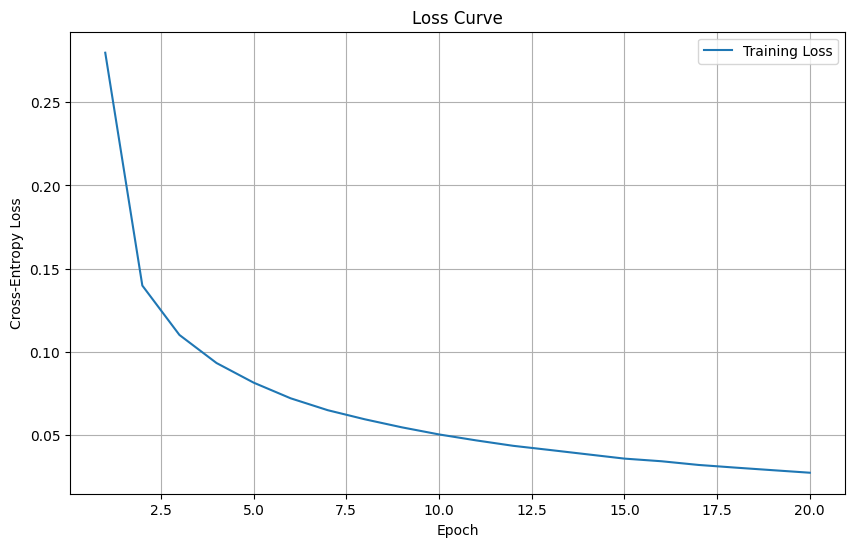

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.datasets import mnist

class FC:
    """
    Number of nodes Fully connected layer from n_nodes1 to n_nodes2

    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the later layer
    initializer: instance of initialization method
    optimizer: instance of optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer

        # Initializing self.W and self.B using the initializer method
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

        # Instantiating variables to store for backward propagation
        self.X = None
        self.dW = None
        self.dB = None

    def forward(self, X):
        """
        Forward propagation

        Parameters
        ----------
        X : The following forms of ndarray, shape (batch_size, n_nodes1)
            input
        Returns
        ----------
        A : The following forms of ndarray, shape (batch_size, n_nodes2)
            output
        """
        # Storing the input X for use in the backward pass
        self.X = X

        # Calculating the output of the fully connected layer
        # A = X @ W + B
        A = np.dot(X, self.W) + self.B

        return A

    def backward(self, dA):
        """
        Backward propagation

        Parameters
        ----------
        dA : The following forms of ndarray, shape (batch_size, n_nodes2)
            Gradient flowing from behind (the next layer)
        Returns
        ----------
        dZ : The following forms of ndarray, shape (batch_size, n_nodes1)
            Gradient to flow forward (to the previous layer)
        """
        # Getting the batch size from the input gradient
        batch_size = dA.shape[0]

        # Calculating the gradients for weights and biases
        # dW = X^T @ dA
        self.dW = np.dot(self.X.T, dA) / batch_size

        # dB = sum(dA) along the batch dimension
        self.dB = np.sum(dA, axis=0) / batch_size

        # Calculating the gradient to pass to the previous layer
        # dZ = dA @ W^T
        dZ = np.dot(dA, self.W.T)

        # Updating the weights and biases using the optimizer
        self = self.optimizer.update(self)

        return dZ


class SimpleInitializer:
    """
    Simple initialization with Gaussian distribution

    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : numpy.ndarray, shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # Initializing weights with a Gaussian distribution
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : numpy.ndarray, shape (n_nodes2,)
            Initialized biases (all zeros)
        """
        # Initializing biases to zeros
        B = np.zeros(n_nodes2)
        return B


class XavierInitializer:
    """
    Xavier initialization with Gaussian distribution

    Parameters
    ----------
    None
    """
    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization with Xavier method
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : numpy.ndarray, shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # Calculating standard deviation according to Xavier formula
        sigma = 1 / np.sqrt(n_nodes1)
        W = sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : numpy.ndarray, shape (n_nodes2,)
            Initialized biases (all zeros)
        """
        # Initializing biases to zeros
        B = np.zeros(n_nodes2)
        return B


class HeInitializer:
    """
    He initialization with Gaussian distribution

    Parameters
    ----------
    None
    """
    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization with He method
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : numpy.ndarray, shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # Calculating standard deviation according to He formula
        sigma = np.sqrt(2 / n_nodes1)
        W = sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : numpy.ndarray, shape (n_nodes2,)
            Initialized biases (all zeros)
        """
        # Initializing biases to zeros
        B = np.zeros(n_nodes2)
        return B


# Optimization Methods

class SGD:
    """
    Stochastic gradient descent

    Parameters
    ----------
    lr : float
        Learning rate
    """
    def __init__(self, lr):
        self.lr = lr

    def update(self, layer):
        """
        Update weights and biases for a layer

        Parameters
        ----------
        layer : Instance of the layer before update
        """
        # Updating weights using the learning rate and the calculated gradient
        layer.W -= self.lr * layer.dW

        # Updating biases using the learning rate and the calculated gradient
        layer.B -= self.lr * layer.dB

        return layer


class AdaGrad:
    """
    AdaGrad (Adaptive Gradient) optimization method.

    Parameters
    ----------
    lr : float
        Learning rate
    """
    def __init__(self, lr):
        self.lr = lr
        self.hW = None  # Sum of squared gradients for weights
        self.hB = None  # Sum of squared gradients for biases

    def update(self, layer):
        """
        Update weights and biases for a layer using AdaGrad.

        Parameters
        ----------
        layer : Instance of the layer before update
        """
        # Initialize hW and hB to zeros with the same shape as the weights/biases
        if self.hW is None:
            self.hW = np.zeros_like(layer.W)
        if self.hB is None:
            self.hB = np.zeros_like(layer.B)

        # Accumulate the square of the gradients
        self.hW += layer.dW ** 2
        self.hB += layer.dB ** 2

        # Update weights and biases with AdaGrad formula
        # Add a small epsilon to avoid division by zero
        layer.W -= self.lr * layer.dW / (np.sqrt(self.hW) + 1e-7)
        layer.B -= self.lr * layer.dB / (np.sqrt(self.hB) + 1e-7)

        return layer


# Activation Functions

class Sigmoid:
    """
    Sigmoid activation function.
    """
    def __init__(self):
        self.Z = None

    def forward(self, A):
        self.Z = 1 / (1 + np.exp(-A))
        return self.Z

    def backward(self, dZ):
        # Gradient of sigmoid: dZ * (1 - Z)
        dA = dZ * (1 - self.Z) * self.Z
        return dA

class ReLU:
    """
    ReLU activation function.
    """
    def __init__(self):
        # Storing input for backward pass
        self.A = None

    def forward(self, A):
        self.A = A
        # Computing ReLU activation using np.maximum
        Z = np.maximum(0, A)
        return Z

    def backward(self, dZ):
        # The gradient is 1 where A > 0 and 0 otherwise.
        dA = dZ.copy()
        dA[self.A <= 0] = 0
        return dA

class Softmax:
    """
    Softmax activation function and Cross-Entropy Loss combined.
    """
    def __init__(self):
        self.loss = None
        self.Z = None
        self.y = None

    def forward(self, A):
        A_stable = A - np.max(A, axis=1, keepdims=True)
        exp_A = np.exp(A_stable)
        self.Z = exp_A / np.sum(exp_A, axis=1, keepdims=True)
        return self.Z

    def backward(self, Z, y_true):
        """
        Backward pass for Softmax with Cross-Entropy Loss.
        The gradient simplifies to Z - y_true.
        """
        batch_size = y_true.shape[0]
        dA = (Z - y_true) / batch_size
        return dA

    def cross_entropy_error(self, Z, y_true):
        batch_size = y_true.shape[0]
        # Adding a small value to Z to avoid log(0)
        loss = -np.sum(y_true * np.log(Z + 1e-7)) / batch_size
        return loss

class ScratchDeepNeuralNetrowkClassifier:
    """
    A deep neural network classifier from scratch.

    Parameters
    ----------
    n_features : int
        The number of features in the input data.
    n_nodes : list of int
        A list where each element represents the number of nodes in a hidden layer.
    n_output : int
        The number of nodes in the output layer (number of classes).
    activations : list of class instances
        A list of activation function class instances for each hidden layer.
        Example: [ReLU(), Sigmoid()]
    initializer: class instance
        An instance of the weight initialization method.
        Example: SimpleInitializer(sigma=0.01)
    optimizer: class instance
        An instance of the optimization method.
        Example: SGD(lr=0.01)
    epochs : int, optional
        The number of iterations for training.
    batch_size : int, optional
        The size of each mini-batch for training.
    verbose : bool, optional
        Whether to print the loss at each epoch.
    """
    def __init__(self, n_features, n_nodes, n_output, activations, initializer, optimizer, epochs=50, batch_size=20, verbose=True):
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.loss = []
        self.n_features = n_features
        self.n_output = n_output
        self.n_nodes = n_nodes
        self.layers = []

        # Saving the optimizer class and its learning rate to create new instances
        optimizer_class = optimizer.__class__
        lr = optimizer.lr

        # Creating FC layers and activation layers

        # Inputting layer to first hidden layer
        self.layers.append(FC(n_features, n_nodes[0], initializer, optimizer_class(lr=lr)))
        self.layers.append(activations[0])

        # Hidden layers
        for i in range(len(n_nodes) - 1):
            self.layers.append(FC(n_nodes[i], n_nodes[i+1], initializer, optimizer_class(lr=lr)))
            self.layers.append(activations[i+1])

        # Last hidden layer to output layer
        self.layers.append(FC(n_nodes[-1], n_output, initializer, optimizer_class(lr=lr)))
        self.layers.append(Softmax())

    def fit(self, X, y):
        """
        Train the model.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data.
        y : The following forms of ndarray, shape (n_samples, 1)
            Correct answer value of training data.
        """
        # One-hot encode the target labels
        y_one_hot = np.eye(self.n_output)[y.astype(int).reshape(-1)]

        for epoch in range(self.epochs):
            # Shuffling the data for each epoch
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y_one_hot[shuffled_indices]

            # Looping through mini-batches
            batch_loss = 0
            for i in range(0, X.shape[0], self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]

                # Forward Propagation
                A = X_batch
                for layer in self.layers:
                    A = layer.forward(A)

                # Calculate loss
                last_layer = self.layers[-1]
                loss = last_layer.cross_entropy_error(A, y_batch)
                batch_loss += loss

                # --- Backward Propagation ---
                # Softmax + Cross-Entropy gradient
                dA = last_layer.backward(A, y_batch)

                # Propagate gradient backward through all layers
                for layer in reversed(self.layers[:-1]):
                    dA = layer.backward(dA)

            avg_loss = batch_loss / (X.shape[0] / self.batch_size)
            self.loss.append(avg_loss)

            if self.verbose:
                print(f"Epoch {epoch+1}/{self.epochs} - Loss: {avg_loss:.4f}")

    def predict(self, X):
        """
        Predict the output.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of test data.

        Returns
        ----------
        pred : The following forms of ndarray, shape (n_samples, 1)
            Predicted values.
        """
        A = X
        for layer in self.layers:
            A = layer.forward(A)

        pred = np.argmax(A, axis=1)

        return pred

# Example Usage

# Main Function
def main():
    print("Loading MNIST dataset...")
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Flattening and normalizing the images
    X_train = X_train.reshape(-1, 784).astype(np.float64) / 255.0
    X_test = X_test.reshape(-1, 784).astype(np.float64) / 255.0

    print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}, Feature size: {X_train.shape[1]}")

    # Splitting training data to use a validation set
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )

    n_features = X_train.shape[1]
    n_output = len(np.unique(y_train))

    # Network Configuration
    n_nodes_hidden = [128, 64]
    activations = [ReLU(), ReLU()]
    initializer = HeInitializer()
    optimizer = AdaGrad(lr=0.01)
    epochs = 20
    batch_size = 100

    print("Initializing the deep neural network...")
    nn = ScratchDeepNeuralNetrowkClassifier(
        n_features=n_features,
        n_nodes=n_nodes_hidden,
        n_output=n_output,
        activations=activations,
        initializer=initializer,
        optimizer=optimizer,
        epochs=epochs,
        batch_size=batch_size,
        verbose=True
    )

    print("Starting training...")
    nn.fit(X_train, y_train)

    print("Training complete. Evaluating on test set...")
    y_pred = nn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Final Test Accuracy on MNIST: {accuracy * 100:.2f}%")

    # Plotting loss curve
    plt.figure(figsize=(10, 6))
    epochs_range = range(1, len(nn.loss) + 1)
    plt.plot(epochs_range, nn.loss, label="Training Loss")
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Cross-Entropy Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()